In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/fastag-fraud-detection-datesets-fictitious/FastagFraudDetection.csv")
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
data.shape

(5000, 13)

In [5]:
data.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [6]:
data.Fraud_indicator.value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

> we can drop all the row which don't have any fastTag id

In [7]:
data[data.Fraud_indicator == 'Fraud'].isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(4451, 13)

In [10]:
data.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

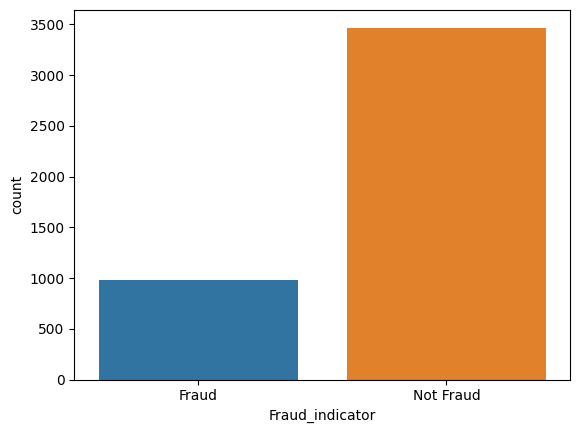

In [11]:
sns.countplot(x='Fraud_indicator', data=data)
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         4451 non-null   int64 
 1   Timestamp              4451 non-null   object
 2   Vehicle_Type           4451 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            4451 non-null   object
 5   Lane_Type              4451 non-null   object
 6   Vehicle_Dimensions     4451 non-null   object
 7   Transaction_Amount     4451 non-null   int64 
 8   Amount_paid            4451 non-null   int64 
 9   Geographical_Location  4451 non-null   object
 10  Vehicle_Speed          4451 non-null   int64 
 11  Vehicle_Plate_Number   4451 non-null   object
 12  Fraud_indicator        4451 non-null   object
dtypes: int64(4), object(9)
memory usage: 486.8+ KB


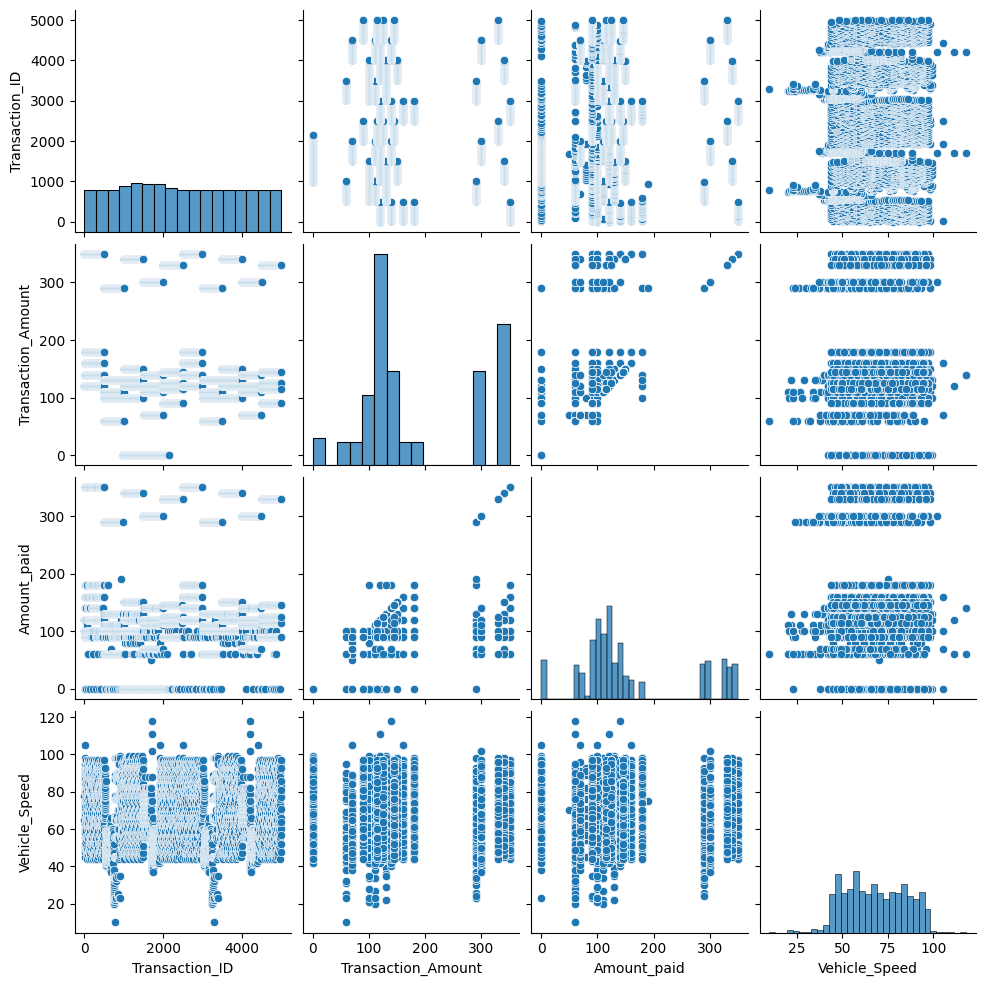

In [13]:
sns.pairplot(data)

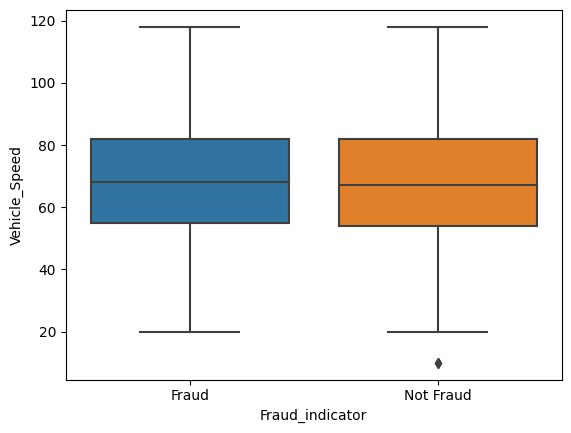

In [14]:
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=data)
plt.show()

In [15]:
data[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()

,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_Amount,1.000000,0.831275,0.061599
Amount_paid,0.831275,1.000000,0.043446
Vehicle_Speed,0.061599,0.043446,1.000000


In [16]:
correlation = data['Transaction_Amount'].corr(data['Amount_paid'])
correlation

0.8312749747685368

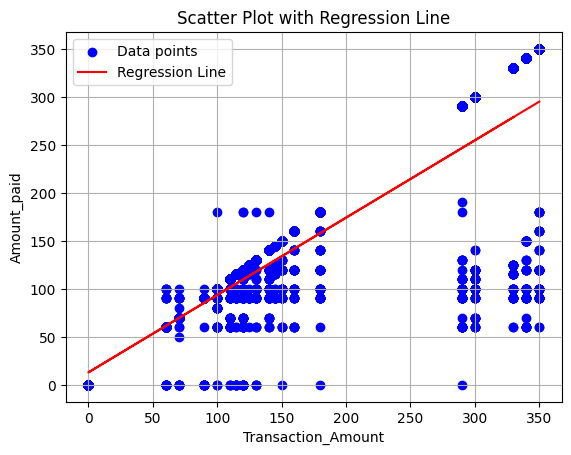

In [17]:
# Calculate the regression line
coefficients = np.polyfit(data['Transaction_Amount'], data['Amount_paid'], 1)
regression_line = np.polyval(coefficients, data['Transaction_Amount'])

# Plot a scatter plot with the regression line
plt.scatter(data['Transaction_Amount'], data['Amount_paid'], color='blue', label='Data points')
plt.plot(data['Transaction_Amount'], regression_line, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Transaction_Amount')
plt.ylabel('Amount_paid')
plt.legend()
plt.grid(True)
plt.show()

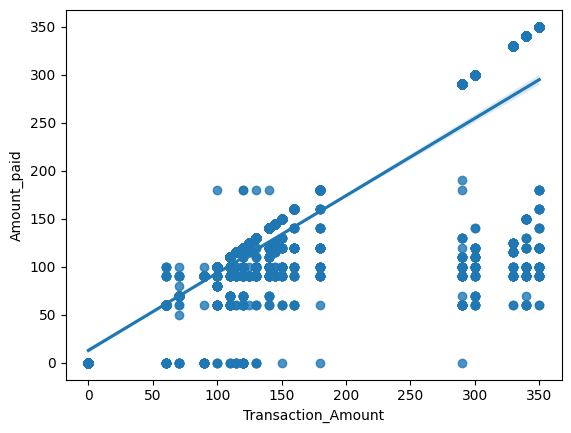

In [18]:
# Scatter plot with regression line between 'Transaction_Amount' and 'Amount_paid'
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=data)
plt.show()


In [19]:
df = data.copy()
df.head(3)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud


In [20]:
X = df[['Transaction_Amount','Amount_paid']]
y = df['Fraud_indicator']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**fit_transform(y_train):**

>This method is used to fit the label encoder to the training data and transform it simultaneously. In other words, it calculates the mapping between unique labels in y_train and assigns an integer to each unique label. It then transforms y_train by replacing the original labels with the assigned integers.
 
**transform(y_test):**

>After the label encoder has been fitted on the training data, you use the transform() method on the testing data (y_test). This applies the same mapping that was learned from the training data to the testing data. It does not recompute the mapping; it uses the mapping learned during the training phase. This ensures consistency in encoding between the training and testing sets.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

>The number of neurons in each layer and the choice of activation functions influence the model's capacity to learn and represent patterns in the data.

In [24]:
#Neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### The compile method in Keras is used to configure the learning process of a neural network model. It requires several key components:

**Optimizer**: The optimizer is responsible for updating the model's weights during training to minimize the loss. 'adam' is one of the most commonly used optimizers. The Adam optimizer adapts the learning rates of each parameter during training, making it efficient for a wide range of tasks.

**Loss Function**: The loss function (or objective function) measures how well the model is performing. For binary classification problems like yours, 'binary_crossentropy' is a suitable loss function. It calculates the binary cross-entropy loss, which is commonly used when the model outputs probabilities for two classes.

**Metrics**: Metrics are used to evaluate the performance of the model. 'accuracy' is a commonly used metric for classification problems. It measures the proportion of correctly classified samples.

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**epochs=10**: This parameter defines the number of times the model will iterate over the entire training dataset. In this case, the model will go through the training dataset 10 times.

**batch_size=32**: This parameter determines the number of samples used in each update of the model's weights. The training dataset is divided into batches, and the model's weights are updated after processing each batch. A batch size of 32 means that 32 samples will be processed before the weights are updated.

**validation_split=0.2**: This parameter indicates the proportion of the training data to be used as validation data. In this case, 20% of the training data will be used for validation. The model's performance on the validation data is monitored during training to assess its generalization to unseen data.

>you may need to adjust hyperparameters like epochs and batch_size based on your specific task and dataset characteristics.








In [27]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
89/89 [==============================] - 2s 6ms/step - loss: 0.6137 - accuracy: 0.6871 - val_loss: 0.4668 - val_accuracy: 0.8567
Epoch 2/10
89/89 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8736 - val_loss: 0.2751 - val_accuracy: 0.8933
Epoch 3/10
89/89 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9154 - val_loss: 0.1931 - val_accuracy: 0.9354
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9505 - val_loss: 0.1477 - val_accuracy: 0.9607
Epoch 5/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9568 - val_loss: 0.1228 - val_accuracy: 0.9635
Epoch 6/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9719 - val_loss: 0.1080 - val_accuracy: 0.9817
Epoch 7/10
89/89 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9800 - val_loss: 0.0982 - val_accuracy: 0.9817
Epoch 8/10
89/89 [==

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)

# Print accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

28/28 [==============================] - 0s 1ms/step
Accuracy: 98.43%
Precision: 0.98
Recall: 1.00
F1 Score: 0.99


In [29]:
print(y_pred_prob[:5])
y_pred[:5]

[[0.97665364]
 [0.97152007]
 [0.9657522 ]
 [0.96596175]
 [0.17162608]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

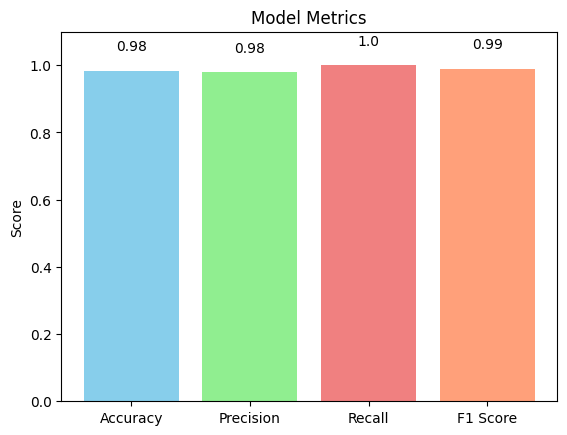

In [30]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define custom colors for bars and text
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
plt.bar(metrics, values, color=bar_colors)

# Adding values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom')

plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1.1)
plt.show()